# Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus Project

*This notebook was generated with the assistance of AI. Please exercise caution when interpreting the code or results and verify them independently as necessary.*

---

## Overview

This notebook introduces [Dandiset 000690 (Version 0.250326.0015)](https://dandiarchive.org/dandiset/000690/0.250326.0015), containing extensive extracellular electrophysiology data collected by the Allen Institute's Openscope Vision2Hippocampus project. The dataset comprises Neuropixels probe recordings from multiple brain regions in mice in response to a variety of visual stimuli, such as moving bars and naturalistic movies.

Researchers can use this notebook to:
- Understand the structure and contents of a typical NWB file in this dandiset.
- Stream and examine file metadata and example data (such as LFPs and electrode locations) without downloading large files.
- Visualize electrode metadata and a sample of Local Field Potential (LFP) traces.

---

## What Does This Notebook Cover?

1. **Overview of the dataset and key metadata.**
2. **How to use the DANDI API to find and stream data files.**
3. **How to access NWB file contents for a representative probe.**
4. **Visualization of electrode locations and LFP data samples.**

---

## Required Packages

This notebook requires the following packages (assumed to be installed):

- `dandi`
- `remfile`
- `h5py`
- `pynwb`
- `pandas`
- `numpy`
- `matplotlib`


## 1. Set Up and Load Required Libraries

In [1]:
# Import required libraries
from dandi.dandiapi import DandiAPIClient
import remfile
import h5py
import pynwb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Browse and Access Data Files in the Dandiset

We'll connect to the DANDI Archive, select a sample NWB file, and explore its content.

In [2]:
# Connect to the DANDI Archive using the API client and list relevant assets
dandiset_id = "000690"
version = "0.250326.0015"

client = DandiAPIClient()
dandiset = client.get_dandiset(dandiset_id, version)

# List a few files in the Dandiset
assets = [a for a in dandiset.get_assets()]
print("Number of files in this version:", len(assets))

# Print the first five NWB files in the Dandiset
print("\nExample files:")
for a in assets[:5]:
    print("-", a.path)

Number of files in this version: 156

Example files:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049.nwb


## 3. Select a Representative NWB File and Stream It Remotely

We'll focus on a representative probe LFP data file:
- `sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb`

We access the file by streaming with `remfile`, avoiding the need to fully download the potentially large file.

In [3]:
# Select a representative file for detailed examination
target_path = "sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb"
target_asset = next(dandiset.get_assets_by_glob(target_path))
download_url = target_asset.download_url

# Open the NWB file via remote HDF5 streaming
remote_file = remfile.File(download_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()

print("Session description:", nwb.session_description)
print("Session start time:", nwb.session_start_time)
print("Subject:", nwb.subject.subject_id, nwb.subject.species)
print("Institution:", nwb.institution)
print("Recording probe groups:", list(nwb.electrode_groups.keys()))

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session description: LFP data and associated info for one probe
Session start time: 2023-09-28 00:00:00-07:00
Subject: 692077 Mus musculus
Institution: Allen Institute for Brain Science
Recording probe groups: ['probeF']


## 4. Examine Electrode Metadata

Each probe recording includes detailed electrode metadata. We'll convert the electrode table to a pandas DataFrame and display key information, such as channel locations within the brain and probe, impedance, and validation status.

In [4]:
# Access the electrode metadata table and convert it to a pandas DataFrame
electrodes_df = nwb.electrodes.to_dataframe()
print("Electrode metadata columns:\n", electrodes_df.columns.tolist())

# Display the first few electrodes
electrodes_df.head()

Electrode metadata columns:
 ['location', 'group', 'group_name', 'probe_vertical_position', 'probe_horizontal_position', 'probe_id', 'local_index', 'valid_data', 'x', 'y', 'z', 'imp', 'filtering']


,location,group,group_name,probe_vertical_position,probe_horizontal_position,probe_id,local_index,valid_data,x,y,z,imp,filtering
id,,,,,,,,,,,,,
4002,DP,probeF abc.EcephysElectrodeGroup at 0x12351661...,probeF,40,59,4,2,True,3523.0,4566.0,5834.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
4006,DP,probeF abc.EcephysElectrodeGroup at 0x12351661...,probeF,80,59,4,6,True,3531.0,4533.0,5848.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
4010,DP,probeF abc.EcephysElectrodeGroup at 0x12351661...,probeF,120,59,4,10,True,3538.0,4501.0,5862.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
4014,DP,probeF abc.EcephysElectrodeGroup at 0x12351661...,probeF,160,59,4,14,True,3548.0,4461.0,5879.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...
4018,DP,probeF abc.EcephysElectrodeGroup at 0x12351661...,probeF,200,59,4,18,True,3554.0,4429.0,5893.0,NaN,AP band: 500 Hz high-pass; LFP band: 1000 Hz l...


### Visualize Spatial Distribution of Electrodes on the Probe

Here, we plot the vertical and horizontal positions of the electrodes to visualize their arrangement on the Neuropixels probe.

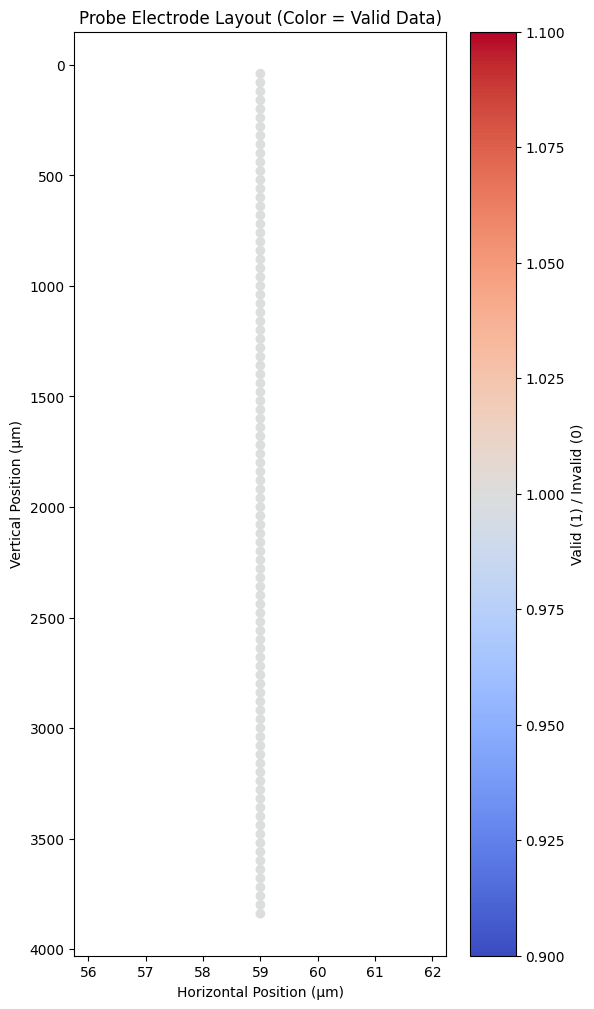

In [5]:
plt.figure(figsize=(6, 12))
plt.scatter(
    electrodes_df["probe_horizontal_position"], 
    electrodes_df["probe_vertical_position"], 
    c=electrodes_df["valid_data"].astype(int), 
    cmap="coolwarm",
    label="Electrode"
)
plt.xlabel("Horizontal Position (μm)")
plt.ylabel("Vertical Position (μm)")
plt.title("Probe Electrode Layout (Color = Valid Data)")
plt.colorbar(label="Valid (1) / Invalid (0)")
plt.gca().invert_yaxis()
plt.show()

## 5. Examine and Plot LFP Data

The NWB file contains local field potential (LFP) data for 96 channels (electrodes). The dataset includes both voltage data and timestamp arrays.

Let's plot a sample of the LFP traces for a short time window for the first few channels.

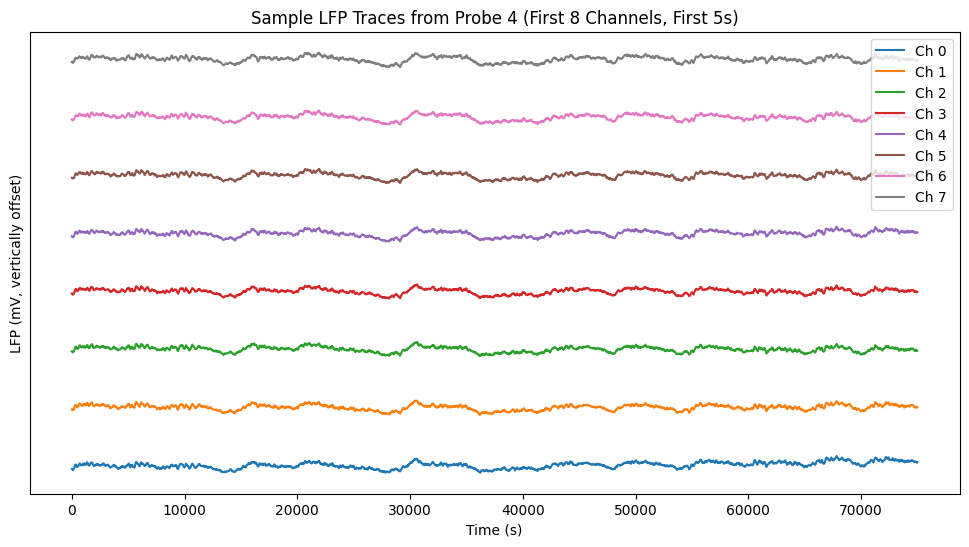

In [6]:
# Get LFP ElectricalSeries
acquisition = nwb.acquisition
probe_4_lfp = acquisition["probe_4_lfp"]  # LFP container
lfp_series = probe_4_lfp.electrical_series["probe_4_lfp_data"]

# Read a small segment of the LFP data (first 5 seconds, first 8 channels)
n_samples = 5 * 625   # 5 seconds at 625 Hz sampling rate
n_channels = 8

lfp_data = lfp_series.data[:n_samples, :n_channels]
lfp_time = lfp_series.timestamps[:n_samples]

plt.figure(figsize=(12, 6))
for ch in range(n_channels):
    plt.plot(lfp_time, lfp_data[:, ch] * 1e3 + ch*2, label=f"Ch {ch}")  # Offset for visualization, convert V to mV

plt.xlabel("Time (s)")
plt.ylabel("LFP (mV, vertically offset)")
plt.title("Sample LFP Traces from Probe 4 (First 8 Channels, First 5s)")
plt.yticks([])
plt.legend(loc="upper right")
plt.show()

## 6. Summary

In this notebook, we explored Dandiset 000690 from the DANDI Archive, focusing on streaming and analyzing NWB files related to the Allen Institute Vision2Hippocampus project. We examined metadata, visualized electrode arrangements, and plotted example LFP data, providing a foundation for further, more detailed analyses.

**For more information and to access the entire dataset, visit**: [https://dandiarchive.org/dandiset/000690/0.250326.0015](https://dandiarchive.org/dandiset/000690/0.250326.0015)

---

*End of notebook. Please consult the official dataset documentation and code APIs for more advanced analyses and for accessing additional modalities (spike times, stimuli presentations, etc.).*